In [1]:
#%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data_df = pd.read_csv("./Resources/city_data.csv")
ride_data_df = pd.read_csv("./Resources/ride_data.csv")
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12
5,South Latoya,11/03/2019 12:26,9.52,1.995000e+12
6,New Paulville,27/02/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,26/04/2019 00:43,35.98,1.119540e+11
8,South Karenland,08/01/2019 03:28,35.09,7.995620e+12
9,North Jasmine,09/03/2019 06:26,42.81,5.327640e+12


In [5]:
# Inspecting the data 

city_data_df.info()
# city_data_df.count()
# city_data_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
# Unique values of type of city 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
urban = sum(city_data_df["type"] == "Urban")
urban

66

In [8]:
rural = sum(city_data_df["type"] == "Rural")
rural

18

In [9]:
suburban = sum(city_data_df["type"] == "Suburban")
suburban

36

In [10]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.3+ KB


In [12]:
# Merging the DataFrames 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3.908450e+12,46,Urban


In [13]:
# Bubble plot 
    # Separating Data Frames to get the data of each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]


In [14]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [15]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

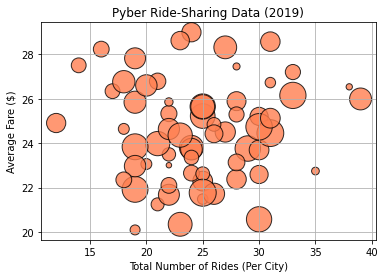

In [16]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_avg_drivers, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend
plt.show()

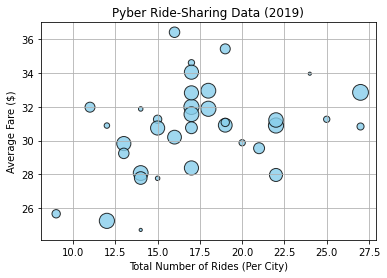

In [17]:
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_avg_drivers, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Subrban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend
plt.show()

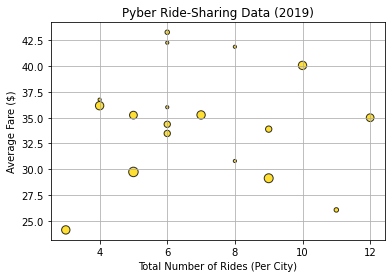

In [18]:
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_avg_drivers, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend
plt.show()

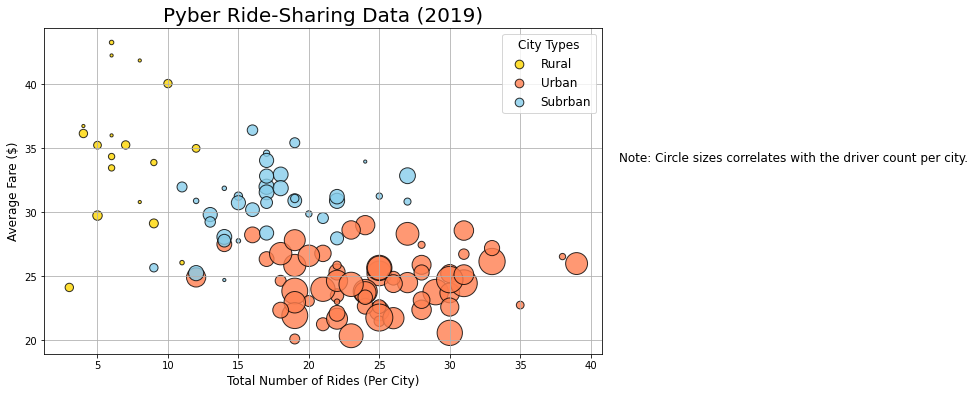

In [26]:
plt.subplots(figsize=(10, 6))

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_avg_drivers, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_avg_drivers, c="coral", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_avg_drivers, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Subrban")


plt.title("Pyber Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize = 12, mode = "Expanded",
                  scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,34, "Note: Circle sizes correlates with the driver count per city.", fontsize=12)
plt.show()

In [27]:
# Save the figure 
plt.savefig("./Analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>